## Observations and Insights
* The most promising treatment is Ramicane base on the lowest statistics values for the tumor volume.
* Base on the scatter plot, it could be assumed that the higher the weight, the higher tumor mass a mouse has.
* In case of mouse L508, it reduced his mass by 5mm3 in 35 timepoints. Proving that the drug benefit it thought time.

# Dependencies and starter code

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.stats as st
from cycler import cycler
import seaborn as sns
sns.set()

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv('Resources/Mouse_metadata.csv')
study_results = pd.read_csv('Resources/Study_results.csv')

In [3]:
# Combine the data into a single dataset
mouse_results = pd.merge(study_results,mouse_metadata,on='Mouse ID',how='left')
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [4]:
# Summary table
mouse_results.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]}).round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.85  42.35  6.51  0.51
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar plots

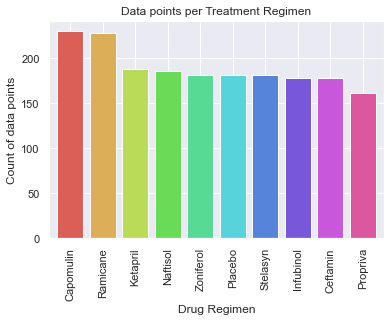

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = mouse_results['Drug Regimen'].value_counts()
counts.plot(kind='bar',width=.8,color=sns.color_palette("hls", 10))
plt.title('Data points per Treatment Regimen')
plt.ylabel("Count of data points")
plt.xlabel('Drug Regimen')
plt.show()

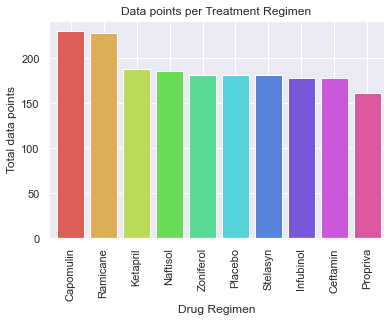

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(counts.index.values,counts.values,color=sns.color_palette("hls", 10),align="center")
plt.xticks(rotation=90)
plt.title("Data points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total data points")
plt.xlim(-0.65, 9.5)
plt.show()

## Pie plots

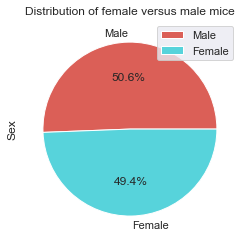

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = pd.DataFrame(mouse_results['Sex'].value_counts())
mouse_sex.plot(kind='pie',y='Sex',title='Distribution of female versus male mice',autopct="%1.1f%%",colors=sns.color_palette("hls", 2))
plt.show()

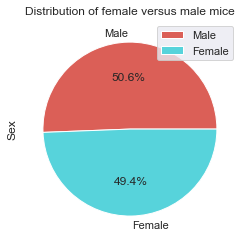

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex, labels=['Male','Female'],autopct="%1.1f%%",colors=sns.color_palette("hls", 2))
plt.legend(['Male','Female'])
plt.title('Distribution of female versus male mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, outliers and boxplots

### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

In [9]:
# Getting the lastest timestamp per mouse and finding the latest tumor volumne.
max_time = mouse_results.groupby(['Mouse ID']).max()
max_time = max_time.reset_index()
max_tumor = max_time[['Mouse ID','Timepoint']].merge(mouse_results,on=['Mouse ID','Timepoint'],how="left")

In [10]:
# Capomulin information
treatment_capo = max_tumor.loc[max_tumor['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']

quartiles_capo = treatment_capo.quantile([.25,.5,.75])
lowerq_capo = quartiles_capo[0.25]
upperq_capo = quartiles_capo[0.75]
iqr_capo = upperq_capo-lowerq_capo

lower_bound_capo = lowerq_capo - (1.5*iqr_capo)
upper_bound_capo = upperq_capo + (1.5*iqr_capo)

outlier_volumes_capo = treatment_capo.loc[(treatment_capo < lower_bound_capo) | (treatment_capo > upper_bound_capo)]

print(f'There could be {len(outlier_volumes_capo)} outliers for Capomulin, base on the IQR information above')

There could be 0 outliers for Capomulin, base on the IQR information above


In [11]:
# Ramicane information
treatment_rami = max_tumor.loc[(max_tumor['Drug Regimen']=='Ramicane')]['Tumor Volume (mm3)']

quartiles_rami = treatment_rami.quantile([.25,.5,.75])
lowerq_rami = quartiles_rami[0.25]
upperq_rami = quartiles_rami[0.75]
iqr_rami = upperq_rami-lowerq_rami

lower_bound_rami = lowerq_rami - (1.5*iqr_rami)
upper_bound_rami = upperq_rami + (1.5*iqr_rami)

outlier_volumes_rami = treatment_rami.loc[(treatment_rami < lower_bound_rami) | (treatment_rami > upper_bound_rami)]

print(f'There could be {len(outlier_volumes_rami)} outliers for Ramicane, base on the IQR information above')

There could be 0 outliers for Ramicane, base on the IQR information above


In [12]:
# Infubinol information
treatment_infu = max_tumor.loc[(max_tumor['Drug Regimen']=='Infubinol')]['Tumor Volume (mm3)']

quartiles_infu = treatment_infu.quantile([.25,.5,.75])
lowerq_infu = quartiles_infu[0.25]
upperq_infu = quartiles_infu[0.75]
iqr_infu = upperq_infu-lowerq_infu

lower_bound_infu = lowerq_infu - (1.5*iqr_infu)
upper_bound_infu = upperq_infu + (1.5*iqr_infu)

outlier_volumes_infu = treatment_infu.loc[(treatment_infu < lower_bound_infu) | (treatment_infu > upper_bound_infu)]

print(f'There could be {len(outlier_volumes_infu)} outliers for Infubinol, base on the IQR information above')

There could be 1 outliers for Infubinol, base on the IQR information above


In [13]:
# Ceftamin information
treatment_ceft = max_tumor.loc[(max_tumor['Drug Regimen']=='Ceftamin')]['Tumor Volume (mm3)']

quartiles_ceft = treatment_ceft.quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
iqr_ceft = upperq_ceft-lowerq_ceft

lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)

outlier_volumes_ceft = treatment_ceft.loc[(treatment_ceft < lower_bound_ceft) | (treatment_ceft > upper_bound_ceft)]

print(f'There could be {len(outlier_volumes_ceft)} outliers for Ceftamin, base on the IQR information above')

There could be 0 outliers for Ceftamin, base on the IQR information above


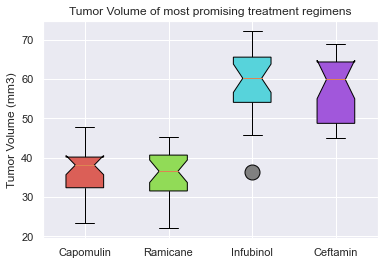

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
colors = sns.color_palette("hls", 4)
box = plt.boxplot(
    [treatment_capo,treatment_rami,treatment_infu,treatment_ceft], 
    labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],
    patch_artist=True,
    notch=True,
    flierprops=dict(markerfacecolor='gray',markersize=15)
)
for b in box:
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

plt.title('Tumor Volume of most promising treatment regimens')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

In [15]:
min_time = mouse_results.groupby(['Mouse ID']).min()
min_time = min_time.reset_index()
dif_growth = min_time[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].merge(max_time,on=['Mouse ID'],how="left")
dif_growth = dif_growth.rename(columns={
    'Timepoint_x':'Initial Timepoint',
    'Tumor Volume (mm3)_x':'Initial Tumor Volumen (mm3)',
    'Timepoint_y':'Final Timepoint',
    'Tumor Volume (mm3)_y':'Final Tumor Volumen (mm3)'
})
dif_growth = dif_growth.drop(['Age_months'], axis=1)

In [16]:
dif_growth['Tumor Growth (mm3)'] = dif_growth['Final Tumor Volumen (mm3)'] - dif_growth['Initial Tumor Volumen (mm3)']
dif_growth.groupby("Drug Regimen").agg({'Tumor Growth (mm3)':["mean","median","var","std","sem"]}).round(2)

Tumor Growth (mm3)                            
                           mean median     var    std   sem
Drug Regimen                                               
Capomulin                 10.36   9.95   22.62   4.76  0.95
Ceftamin                  12.75  14.85   69.98   8.37  1.67
Infubinol                 13.87  15.17   54.45   7.38  1.48
Ketapril                  17.81  19.49   98.92   9.95  1.99
Naftisol                  16.21  18.28  106.03  10.30  2.06
Placebo                   15.51  17.03   78.76   8.87  1.77
Propriva                  11.74  10.84   69.35   8.33  1.67
Ramicane                  10.04   9.62   27.06   5.20  1.04
Stelasyn                  16.00  17.19   90.33   9.50  1.94
Zoniferol                 14.18  16.84   76.86   8.77  1.75

In [56]:
# Isolating Capomulin Drug Treatment data by mouse
mouse_capo = mouse_results.loc[mouse_results['Drug Regimen']=='Capomulin']
permouse_capo = mouse_capo.groupby('Mouse ID').mean()
permouse_capo

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
linear_regression = st.linregress(
    permouse_capo['Weight (g)'], 
    permouse_capo['Tumor Volume (mm3)']
)

capo_fit = linear_regression[0] * permouse_capo['Weight (g)'] + linear_regression[1]
corr = round(st.pearsonr(permouse_capo['Weight (g)'],permouse_capo['Tumor Volume (mm3)'])[0],2)

The correlation between Weight and average Tumor Volume is 0.84


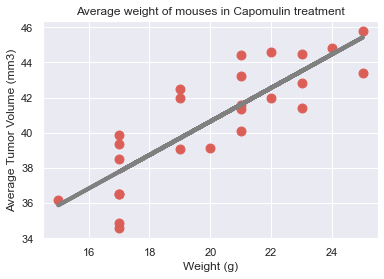

In [87]:
# Plot scatter points for each mouse and the correlation between the weight and the tumor volumen
permouse_capo.plot.scatter(
    x = 'Weight (g)',
    y = 'Tumor Volume (mm3)',
    c = sns.color_palette("hls", 1),
    s = 80
)

print(f"The correlation between Weight and average Tumor Volume is {corr}")
plt.plot(permouse_capo['Weight (g)'],capo_fit,color='gray',linewidth=4)
plt.title('Average weight of mouses in Capomulin treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

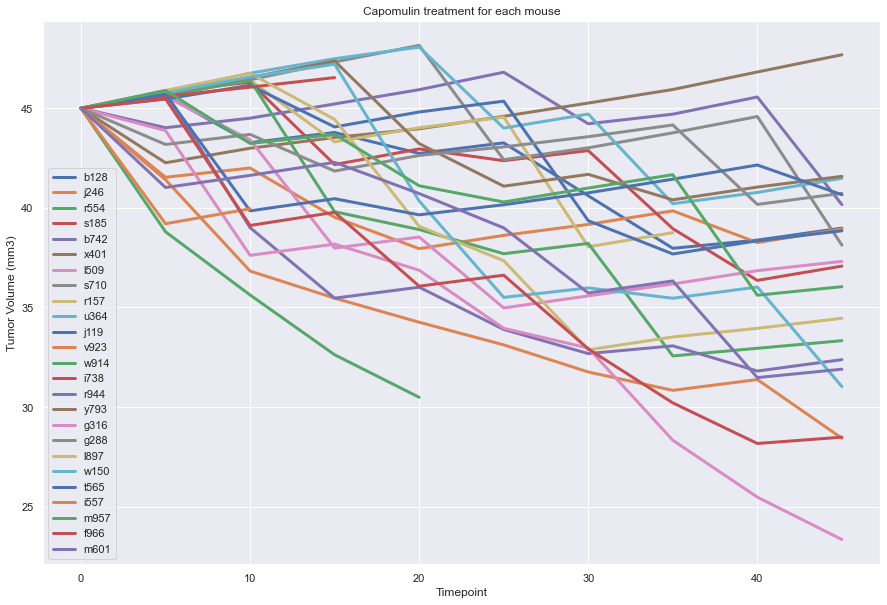

In [109]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
fig, ax = plt.subplots()

# plot_line = 
mouse_capo.groupby('Mouse ID').plot.line(
    x = 'Timepoint', 
    y = 'Tumor Volume (mm3)',
    ax = ax,
    legend = False,
    figsize = (15, 10),
    linewidth = 3
)
plt.title('Capomulin treatment for each mouse')
ax.legend(mouse_capo['Mouse ID'])
plt.rc('axes', prop_cycle = (cycler('color', (sns.color_palette("hls", 25)))))
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()